In [51]:
import sys
import spotipy
import spotipy.util as util
import os
import json
%matplotlib inline 
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0) # larger figure size
#os.environ["SPOTIPY_CLIENT_ID"] = "5d473f4466dc4f19b7bdde000412e313"
#os.environ["SPOTIPY_CLIENT_SECRET"] = "a8775df3ba3845a9bcdad2bc3eec44f7"
#os.environ["SPOTIPY_REDIRECT_URI"] = "http://localhost:8888/callback"
key="BQBQbKyOHXsio9vacc6JQeDPVklepxa-xNGWl-BtgD31QR6yb92jz4489LJCHE9iLU0c-RyL7h5oi5jtvoxk8rEWnlbDfyHVBAW0jqicSU6gK8u1YGsk9EA4ptW4-_upUsQ96J6YUraLxvoPLOwuPCry"
sp = spotipy.Spotify(auth=key)
user=input("Enter username: ")
playlists = sp.user_playlists(user)
s1 = json.dumps(playlists)
d2 = json.loads(s1)
print("**LISTING PLAYLISTS**")
num=0
try:
    while num<50:
        print(d2["items"][num]["name"])
        num+=1
except:
    print("**ALL PLAYLISTS LISTED**")
userplaylist=input("Select Playlist: ")
num=0
try:
    while num<50:
        if((d2["items"][num]["name"])==userplaylist):
            print("ACCESSING", userplaylist)
            break
        else:
            num+=1
except:
    print("**ERROR NOT FOUND**")
tracks=sp.user_playlist_tracks(user,d2["items"][num]["id"])
ss1 = json.dumps(tracks)
dd2 = json.loads(ss1)
num2=0
try:
    while num2<100:
        print(dd2["items"][num2]["track"]["name"])
        num2+=1
except:
    print("**ALL SONGS LISTED**")
num2=0
max=0
min=999
count1=0
poplist=[]
try:
    while num2<100:
        numstr=(dd2["items"][num2]["track"]["popularity"])
        numberstrlist=str(numstr)
        poplist.append(int(numberstrlist[0])*10)
        if (dd2["items"][num2]["track"]["popularity"])>max:
            max=(dd2["items"][num2]["track"]["popularity"])
            maxnum=num2
        if (dd2["items"][num2]["track"]["popularity"])<min:
            min=(dd2["items"][num2]["track"]["popularity"])
            minnum=num2
        num2+=1
        count1+=(dd2["items"][num2]["track"]["popularity"])
except:
    print("**POPULARITY RESULTS**")
print("most popular track:",(dd2["items"][maxnum]["track"]["name"]))
print("least popular track:",(dd2["items"][minnum]["track"]["name"]))
print("average popularity (100=most popular):", count1/num2)
print("done")

Enter username: Nin_mnb
**LISTING PLAYLISTS**
Discover Weekly
Carrot Cake
Matt's Top 40
5/3
4/26
4/19
4/12
4/5
3/29
3/22
3/8
3/1
2/22
2/15
2/8
12/7
11/30
11/17
11/9
11/2
10/26
10/19
10/12
10/5
9/28
grad
Discover Weekly Archive
Reaganomics
Sforzando
Cool jazz & Italian café
King Gizzard & The Lizard Wizard Complete
MF DOOM Complete
Radiohead Complete
Mac Demarco
Milo Complete
Tame Impala Complete
HOMESHAKE Complete
Hiatus Kaiyote Complete
Unknown Mortal Orchestra Complete
Lana Del Rey Complete
Two Door Cinema Club Complete
Your Top Songs 2017
Your Top Songs 2016
Release Radar
pmdb+sobe
star gazing
This Is: Miles Davis
songs that pair well with a carrot based lunch
not not happy
Manhattan
Select Playlist: Matt's Top 40
ACCESSING Matt's Top 40
Yomilo
I'm sorry (feat. shiloh)
Vomitspit
Birds Dont Sing
Border Line
Oh Sailor
History Eraser
Young
Cigarettes In The Theatre
Foreign 2
Eventually
Closer
Shadow
The Suburbs
Shuggie
Celebrate
Age Of Consent - 2015 Remastered Version
Gamma Knife
Pede

[0, 20, 50, 50, 50, 30, 30, 60, 50, 40, 60, 30, 50, 50, 60, 40, 60, 40, 30, 30, 40, 70, 50, 60, 30, 50, 20, 60, 50, 30, 50, 50, 40, 40, 50, 50, 40, 60, 40, 10]
40


TypeError: object of type 'type' has no len()

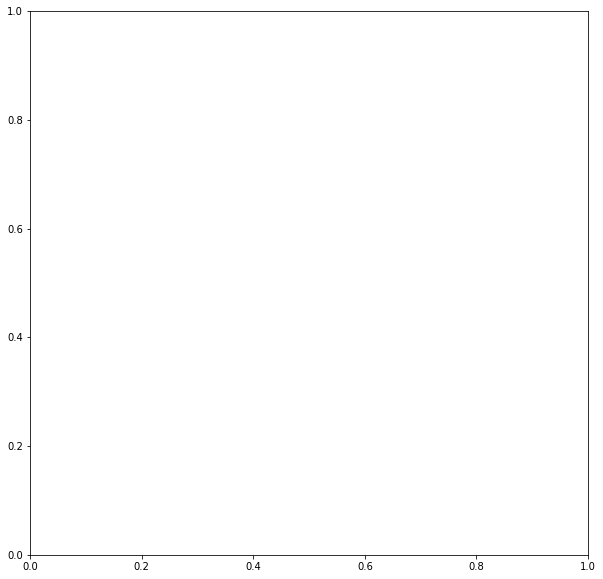

In [70]:
print(poplist)
print(num2)
#help(plt.pie)
plt.pie(poplist,None,list)

In [12]:
import spotipy
spotify = spotipy.Spotify()
key="BQDwWNK4j8znR9UgJmJYbWr1MCxHyuM1YuvgZemH3-A5TIGT6bgwkS5ShiYVqKbb5SGVTVH0et6oBYNcImbhD1x4Bn_cAywv17_P-1wztVZ49LHFLVLFKJ8qK43ks3XeL3VpP23dnccDK809BT_Y7xas"
sp = spotipy.Spotify(auth=key)
name=input('please enter a artist name:')
results = sp.search(q='artist:'+ name, type='artist')
s1 = json.dumps(results)
d2 = json.loads(s1)
numindex=1
for name in d2['artists']['items']:
    print(numindex, name['name'])
    numindex+=1
confirm=int(input('please choose 1-10 to confirm: '))
print(d2['artists']['items'][confirm-1]['name'])
results2 = sp.search(d2['artists']['items'][confirm-1]['name'],type='track')
track1 = json.dumps(results2)
track2 = json.loads(track1)
for tracks in track2['tracks']['items']:
    print(tracks['name'])


please enter a artist name:Justin
1 Justin Timberlake
2 Justin Bieber
3 Justin Moore
4 Justin Quiles
5 Justin Jesso
6 Justin Hurwitz
7 Justin Adams
8 Justin Caruso
9 Justin Stone
10 Justin Bohon
please choose 1-10 to confirm2
Justin Bieber
Despacito - Remix
Juke Jam (feat. Justin Bieber & Towkio)
Where Are Ü Now (with Justin Bieber)
I'm the One
Deja Vu
Love Yourself
Friends (with BloodPop®)
Sorry
Let Me Love You
What Do You Mean?


In [9]:
print(dd2["items"][1]["track"]["popularity"])

55


In [22]:
print(d2)

{'href': 'https://api.spotify.com/v1/users/nin_mnvb/playlists?offset=0&limit=50', 'items': [], 'limit': 50, 'next': None, 'offset': 0, 'previous': None, 'total': 0}


In [8]:
#key="BQAPT0SXsk7-NdzE2GxEz_y7y2qn3gEm2JMtQvvzBUXxYI1LZ-iQ7CNXWbrsmW0IB2eAKWVh7QU6lpeRzCJvB9-zAEpvDd3xh6COMysD145DKw3LPxJExLxC4qzU8D-ujWIIITevfEVuOpeyHTCf0Ll-"
#sp = spotipy.Spotify(auth=key)
#track = sp.track("2mkv1b3dRFyiJ4Ybq31owf")
#print(track)

help(spotipy.Spotify)

Help on class Spotify in module spotipy.client:

class Spotify(builtins.object)
 |  Example usage::
 |  
 |      import spotipy
 |  
 |      urn = 'spotify:artist:3jOstUTkEu2JkjvRdBA5Gu'
 |      sp = spotipy.Spotify()
 |  
 |      sp.trace = True # turn on tracing
 |      sp.trace_out = True # turn on trace out
 |  
 |      artist = sp.artist(urn)
 |      print(artist)
 |  
 |      user = sp.user('plamere')
 |      print(user)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, auth=None, requests_session=True, client_credentials_manager=None, proxies=None, requests_timeout=None)
 |      Create a Spotify API object.
 |      
 |      :param auth: An authorization token (optional)
 |      :param requests_session:
 |          A Requests session object or a truthy value to create one.
 |          A falsy value disables sessions.
 |          It should generally be a good idea to keep sessions enabled
 |          for performance reasons (connection pooling).
 |      :param client_credenti